In [1]:
# letterdata.csv
#location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('datasets/letterdata.csv')

In [5]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
##### Seperate the input and output data

In [7]:
x=df.drop('letter',axis=1)
y=df['letter']

<Axes: xlabel='count', ylabel='letter'>

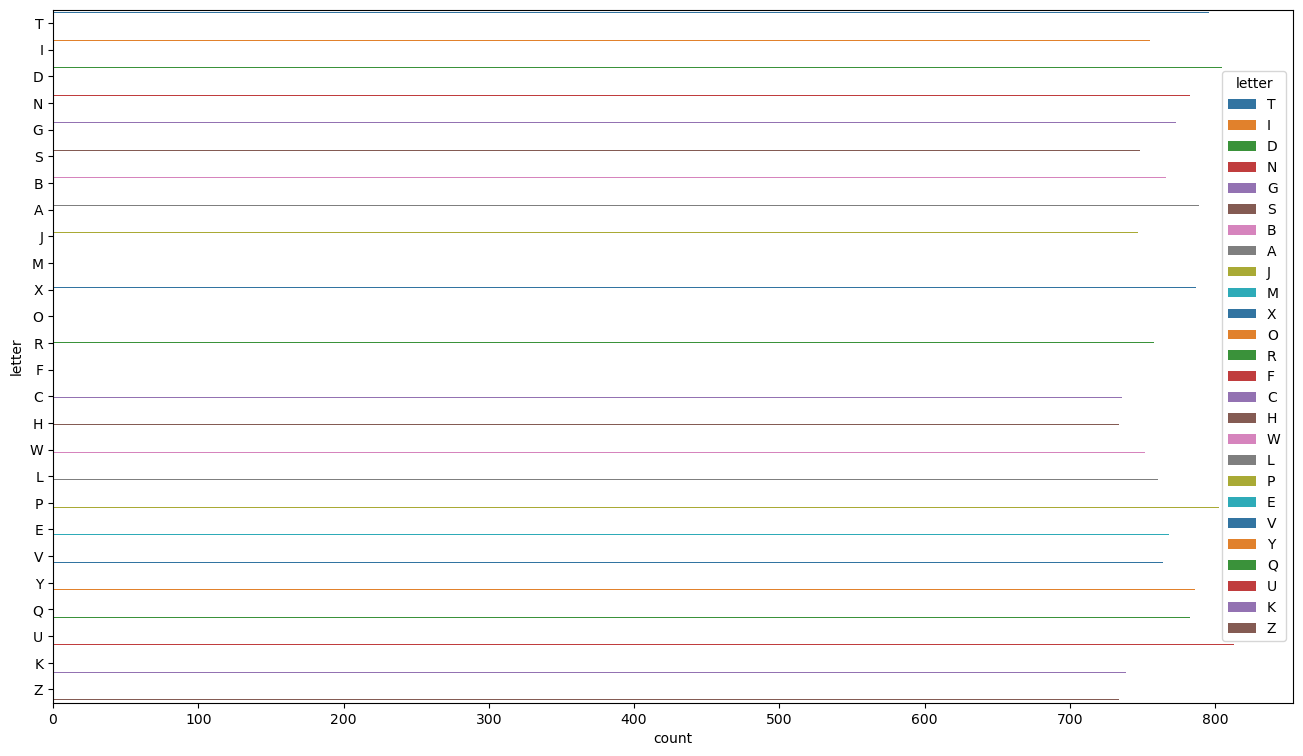

In [9]:
plt.figure(figsize=(16,9))
sns.countplot(y=y,palette='tab10',hue=y)

In [10]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [11]:
x.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


##### Cross Validation

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0, stratify=y, test_size=0.20)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16000, 16), (4000, 16), (16000,), (4000,))

##### Build the model

In [35]:
from sklearn.svm import SVC

In [50]:
svc=SVC(kernel='poly',random_state=0)# kernel= linear, rbf, poly,sigmoid

In [51]:
svc.fit(x_train,y_train)# using trained input and output we trained the algo

SVC(kernel='poly', random_state=0)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [53]:
y_pred=svc.predict(x_test)# by giving test data we predict the value

In [54]:
print(confusion_matrix(y_test,y_pred))

[[156   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   2   0]
 [  0 142   0   0   1   0   0   2   0   0   0   0   0   2   0   0   0   4
    1   0   0   1   0   0   0   0]
 [  0   0 144   0   1   0   1   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 157   0   0   0   1   0   0   0   0   0   1   0   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   1   0   0 145   0   5   0   0   0   0   0   0   0   0   0   1   0
    1   0   0   0   0   1   0   0]
 [  0   0   1   0   1 148   0   1   0   0   0   0   0   1   0   1   0   0
    1   1   0   0   0   0   0   0]
 [  0   0   1   2   1   0 145   0   0   0   0   0   0   0   2   0   2   2
    0   0   0   0   0   0   0   0]
 [  0   0   2   4   1   1   0 133   0   0   4   0   0   0   0   0   1   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0 147   1   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [55]:
accuracy_score(y_test,y_pred)

0.949

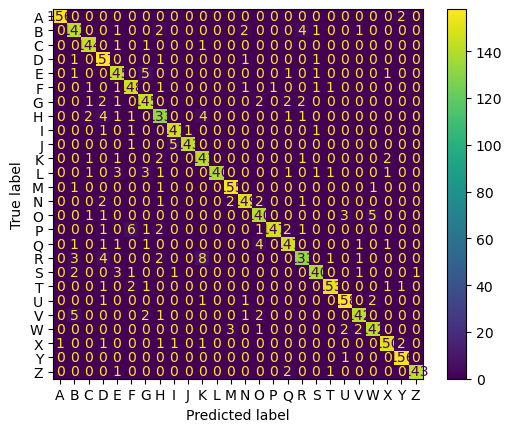

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [57]:
accuracy_score(y_test,y_pred)

0.949

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.92      0.94      0.93       158
           B       0.77      0.84      0.80       153
           C       0.84      0.87      0.86       147
           D       0.80      0.91      0.85       161
           E       0.81      0.80      0.81       154
           F       0.79      0.90      0.84       155
           G       0.72      0.84      0.77       155
           H       0.68      0.71      0.69       147
           I       0.90      0.88      0.89       151
           J       0.85      0.90      0.87       149
           K       0.75      0.84      0.80       148
           L       0.94      0.90      0.92       152
           M       0.90      0.96      0.93       158
           N       0.90      0.89      0.89       157
           O       0.86      0.76      0.81       150
           P       0.95      0.84      0.89       161
           Q       0.90      0.76      0.82       157
           R       0.81    

In [58]:
# randomly choosen row

In [59]:
new=x_test.iloc[[34,675,123,2045,332,3567],:]

In [60]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
6242,2,3,4,2,2,8,8,4,4,8,5,7,2,7,4,10
2211,2,7,4,5,3,12,3,2,2,9,2,9,3,7,3,9
14363,7,11,6,6,3,6,10,2,6,11,7,5,2,9,6,5
9494,2,9,3,7,1,15,2,6,5,14,1,9,0,7,0,8
6354,1,0,2,0,0,7,10,3,1,7,12,8,1,11,0,8
4121,2,1,2,1,1,5,11,7,1,9,6,4,1,9,3,8


In [63]:
y_test.iloc[[34,675,123,2045,332,3567]].values

array(['R', 'A', 'F', 'J', 'Y', 'P'], dtype=object)

In [64]:
y_test

1824     A
2822     H
10240    S
11466    Z
16286    L
        ..
2423     Q
2174     Z
19505    I
18095    B
9903     L
Name: letter, Length: 4000, dtype: object

In [61]:
svc.predict(new)

array(['R', 'A', 'F', 'J', 'Y', 'P'], dtype=object)